In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys
import seaborn as sb
import random as rand
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)

Calculating centroids:

In [ ]:
def compute_centroid_sse(all_vals,K, centroid_mat):
    dist_list=[]
    centroids_list= []
    error_in_each_clust=[]
    for i in range(centroid_mat.shape[0]):
        z= np.linalg.norm((all_vals - centroid_mat[i]), axis=1).reshape(-1,1)
        dist_list.append(z)
    
    dist_max= np.array(dist_list)
    dist_max= dist_max.transpose().reshape(all_vals.shape[0],K)
    clust_assign= np.argmin(dist_max, axis=1) #index of min. distance -> cluster number
   
        
    for c in range(K): 
        clust_datapts= all_vals[np.where(clust_assign==c)[0]] #assign data pts. belonging to cluster c
        mean_dist= np.mean(clust_datapts, axis=0)
        centroids_list.append(mean_dist)    
        compute_dist=np.linalg.norm((clust_datapts - mean_dist), axis=1).reshape(-1,1)
        error_in_each_clust.extend(compute_dist)
         
    sse= sum(error_in_each_clust)
    
    return clust_assign, centroids_list, sse

In [ ]:
#k-means clustering
def kmeans_clustering(all_vals,K,max_iter = 100, tol = pow(10,-3) ):
    init_k =random.sample(range(0,150), K)
    centroids_list= all_vals[init_k]
    centroid_mat= np.array(centroids_list)
    iter=0
    all_sse= []
    clust_assign, centroids_list, sse =compute_centroid_sse(all_vals,K, centroid_mat)
    all_sse.append(sse[0])
    centroid_mat= np.array(centroids_list)
    iter= iter+1
    while(iter < max_iter):
        clust_assign, centroids_list, sse= compute_centroid_sse(all_vals,K, centroid_mat)
        all_sse.append(sse[0])
        centroid_mat= np.array(centroids_list)
        if np.absolute(all_sse[iter] - all_sse[iter-1])/all_sse[iter-1] < tol:
            break
        iter= iter+1

    #if np.absolute(all_sse[iter] - all_sse[iter-1])/all_sse[iter-1] <= tol:
    #    print('Tolerance for SSE reached')
    #if iter >= max_iter:
    #    print('Maximum iteration reached')
        
    return clust_assign, centroid_mat, all_sse, iter+1

In [ ]:
all_vals= data.iloc[:, :-1].values
clust_assign, centroid_mat, all_sse, itr= kmeans_clustering(all_vals, 3)

### Visualizing K-means 

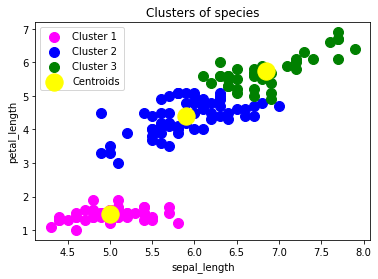

In [ ]:
clust_assign, centroid_mat, all_sse, itr= kmeans_clustering(all_vals, 3)
plt.scatter(all_vals[clust_assign == 0, 0], all_vals[clust_assign == 0, 2], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(all_vals[clust_assign == 1, 0], all_vals[clust_assign == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(all_vals[clust_assign == 2, 0], all_vals[clust_assign == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(centroid_mat[:,0], centroid_mat[:,2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of species')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

Elbow plot:

C:\Users\himan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\himan\anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


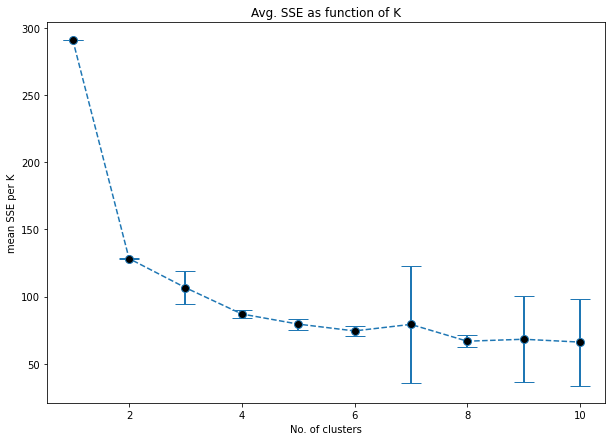

In [ ]:
mean_SSE_K= []
std_dev_K=[]
for K in range(1,11):
    SSE=[]
    for j in range(50):
        clust_assign, centroid_mat, all_sse, itr= kmeans_clustering(all_vals, K)
        SSE.append(all_sse[-1])
    mean_SSE_K.append(round(np.mean(SSE),3))
    std_dev_K.append(round(np.std(SSE),3))
    
plt.figure(figsize=(10,7))
plt.errorbar(range(1,11), mean_SSE_K, yerr=std_dev_K, fmt='o', mfc='black', ms=8, elinewidth=2, capsize=10, linestyle="--")
plt.title("Avg. SSE as function of K")
plt.xlabel("No. of clusters")
plt.ylabel("mean SSE per K")
plt.show()